# Classifying movie reviews: a binary classification example

In [36]:
from tensorflow.keras.datasets import imdb

In [37]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

/Users/david/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/david/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [38]:
max([max(i) for i in train_data])

9999

In [39]:
word_index = imdb.get_word_index()

In [40]:
revise_index = dict([(value, key) for (key, value) in word_index.items()])

In [41]:
decoded_review = ' '.join([revise_index.get(i-3,'?') for i in train_data[0]])

In [42]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [93]:
newlst = sorted(train_data[0], reverse=True)
print(newlst)

7486


In [67]:
max(train_data[0])

7486

In [72]:
len(train_data)

25000

In [114]:
len(test_data)

25000

In [99]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1        
    return results

In [115]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [145]:
x_train[0, :]

array([0., 1., 1., ..., 0., 0., 0.])

In [116]:
result = np.zeros((25000, 10000))

In [123]:
result[0, train_data[0]] = 1

In [147]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [149]:
from tensorflow.keras import layers, models

In [156]:
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 
# optimizer=optimizers.RMSprop(lr=0.001)
# metrics=[metrics.binary_accuracy]
# sigmoid = 1 / (1 + np.exp(-x))

In [157]:
from sklearn.model_selection import train_test_split

In [159]:
Xpart, Xval, ypart, yval = train_test_split(x_train, y_train)

In [160]:
history = network.fit(Xpart, ypart, epochs=20, batch_size=512, validation_data=(Xval, yval))

Train on 18750 samples, validate on 6250 samples
Epoch 1/20
18750/18750 [==============================] - 3s 185us/step - loss: 0.4809 - acc: 0.8025 - val_loss: 0.3517 - val_acc: 0.8750
Epoch 2/20
18750/18750 [==============================] - 1s 63us/step - loss: 0.2812 - acc: 0.9041 - val_loss: 0.2886 - val_acc: 0.8898
Epoch 3/20
18750/18750 [==============================] - 1s 63us/step - loss: 0.2101 - acc: 0.9293 - val_loss: 0.2730 - val_acc: 0.8944
Epoch 4/20
18750/18750 [==============================] - 1s 63us/step - loss: 0.1693 - acc: 0.9429 - val_loss: 0.2737 - val_acc: 0.8942
Epoch 5/20
18750/18750 [==============================] - 1s 64us/step - loss: 0.1426 - acc: 0.9524 - val_loss: 0.2863 - val_acc: 0.8923
Epoch 6/20
18750/18750 [==============================] - 1s 62us/step - loss: 0.1204 - acc: 0.9609 - val_loss: 0.3000 - val_acc: 0.8933
Epoch 7/20
18750/18750 [==============================] - 1s 63us/step - loss: 0.1027 - acc: 0.9682 - val_loss: 0.3214 - val_acc

In [162]:
hist_dict=history.history

In [163]:
hist_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [169]:
loss_values = hist_dict['loss']
loss_val = hist_dict['val_loss']
epoches = range(1, 20+1)

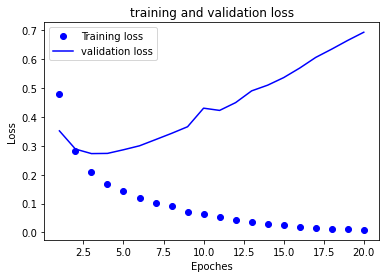

In [173]:
plt.plot(epoches, loss_values, 'bo', label='Training loss')
plt.plot(epoches, loss_val, 'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend();

In [174]:
acc = hist_dict['acc']
acc_val = hist_dict['val_acc']

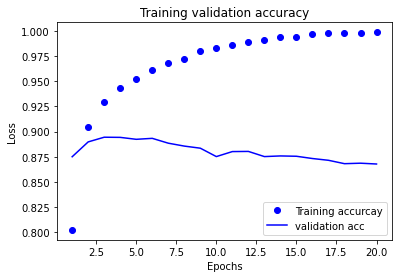

In [176]:
plt.plot(epoches, acc, 'bo', label='Training accurcay')
plt.plot(epoches, acc_val, 'b', label = 'validation acc')
plt.title('Training validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [177]:
network.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s 128us/step - loss: 0.1503 - acc: 0.9665
Epoch 2/4
25000/25000 [==============================] - 1s 52us/step - loss: 0.0914 - acc: 0.9765
Epoch 3/4
25000/25000 [==============================] - 1s 51us/step - loss: 0.0655 - acc: 0.9836
Epoch 4/4
25000/25000 [==============================] - 1s 53us/step - loss: 0.0480 - acc: 0.9880


In [178]:
result = network.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 119us/step


In [179]:
result #85%

[0.5880649370193481, 0.854]

In [180]:
network.predict(x_test)

array([[0.01075898],
       [0.99999106],
       [0.99998   ],
       ...,
       [0.17521335],
       [0.00464707],
       [0.98812443]], dtype=float32)